In [1]:
from numpy import *
import sys
sys.path.insert(0, 'velocitySlamSeq//slam_seq')

In [2]:
from gillespie import *

In [3]:
params = {'a': 0.1, 'b': 0.5, 'la': 0.7, 'alpha_a': 100, 'alpha_i': 1, 'sigma': 0.6, 'beta': 0.5, 'gamma': 0.1}
print('params_true = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'\
      %(params['a'], params['b'], params['la'], params['alpha_a'], params['alpha_i'], params['sigma'], params['beta'], params['gamma']))

params_true = a: 0.100, b: 0.500, la: 0.700, alpha_a: 100.000, alpha_i: 1.000, sigma: 0.600, beta: 0.500, gamma: 0.100


In [4]:
trajs_T, trajs_C = simulate_Gillespie(*list(params.values()), C0=zeros(5), t_span=[0, 50], n_traj=50, report=True)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

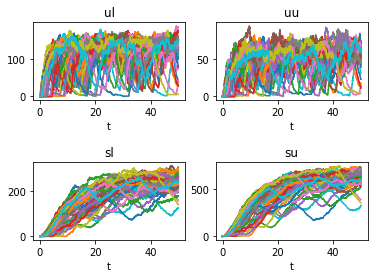

In [6]:
n_trajs = len(trajs_C)
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for i in range(n_trajs):
    ax1.plot(trajs_T[i], trajs_C[i][1])
    ax2.plot(trajs_T[i], trajs_C[i][2])
    ax3.plot(trajs_T[i], trajs_C[i][3])
    ax4.plot(trajs_T[i], trajs_C[i][4])
ax1.set_xlabel('t')
ax1.set_title('ul')
ax2.set_xlabel('t')
ax2.set_title('uu')
ax3.set_xlabel('t')
ax3.set_title('sl')
ax4.set_xlabel('t')
ax4.set_title('su')
plt.subplots_adjust(hspace=0.8)

In [7]:
T = linspace(0, 45, 46)
n_species = 5;
n_mean = zeros((n_species, len(T)))
n_2mom = zeros((n_species, len(T)))
for j in range(n_species):
    n_mean[j] = temporal_average( T, trajs_T, trajs_C, j );
    n_2mom[j] = temporal_average( T, trajs_T, trajs_C, j, lambda x : x*(x-1) );
n_var = n_2mom + n_mean - n_mean**2;

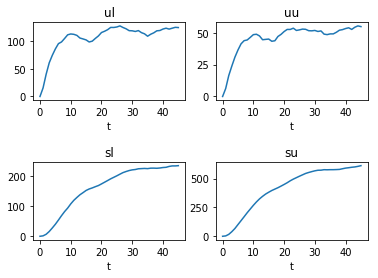

In [8]:
plt.subplot(2, 2, 1)
plt.plot(T, n_mean[1])
plt.xlabel('t')
plt.title('ul')

plt.subplot(2, 2, 2)
plt.plot(T, n_mean[2])
plt.xlabel('t')
plt.title('uu')

plt.subplot(2, 2, 3)
plt.plot(T, n_mean[3])
plt.xlabel('t')
plt.title('sl')

plt.subplot(2, 2, 4)
plt.plot(T, n_mean[4])
plt.xlabel('t')
plt.title('su')
plt.subplots_adjust(hspace=0.8)

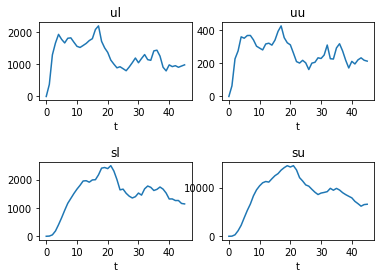

In [9]:
plt.subplot(2, 2, 1)
plt.plot(T, n_var[1])
plt.xlabel('t')
plt.title('ul')

plt.subplot(2, 2, 2)
plt.plot(T, n_var[2])
plt.xlabel('t')
plt.title('uu')

plt.subplot(2, 2, 3)
plt.plot(T, n_var[3])
plt.xlabel('t')
plt.title('sl')

plt.subplot(2, 2, 4)
plt.plot(T, n_var[4])
plt.xlabel('t')
plt.title('su')
plt.subplots_adjust(hspace=0.8)

In [10]:
from moments import moments, estimation
import time

In [11]:
x_data = vstack((n_mean[1:, :], n_var[1:, :]))
print(x_data.shape)

(8, 46)


In [12]:
p0_range = {'a': [0, 1], 'b': [0, 1], 'la': [0, 1], 'alpha_a': [10, 1000], \
            'alpha_i': [0, 10], 'sigma': [0, 1], 'beta': [0, 10], 'gamma': [0, 10]}
tim = time.time()
estm = estimation(list(p0_range.values()))
popt, cost = estm.fit_lsq(T, x_data, p0=None, n_p0=10)
elapse = time.time()-tim
print('Computing time: %.3f'%elapse)

velocitySlamSeq//slam_seq\moments.py:276: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i] = U.dot(expD**(t[i]-t0)).dot(V).dot(y0) - x_ss


Computing time: 1.056


In [13]:
print('popt = a: %.4f, b: %.4f, la: %.4f, alpha_a: %.4f, alpha_i: %.4f, sigma: %.4f, beta: %.4f, gamma: %.4f'%(popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]))
print('params_true = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'\
      %(params['a'], params['b'], params['la'], params['alpha_a'], params['alpha_i'], params['sigma'], params['beta'], params['gamma']))

popt = a: 0.1721, b: 0.5077, la: 0.6995, alpha_a: 93.5193, alpha_i: 5.0413, sigma: 0.5914, beta: 0.4846, gamma: 0.0884
params_true = a: 0.100, b: 0.500, la: 0.700, alpha_a: 100.000, alpha_i: 1.000, sigma: 0.600, beta: 0.500, gamma: 0.100


In [14]:
trajs_C_nosplice = convert_nosplice(trajs_T, trajs_C)
n_species = 2;
n_mean = zeros((n_species, len(T)))
n_2mom = zeros((n_species, len(T)))
for j in range(n_species):
    n_mean[j] = temporal_average( T, trajs_T, trajs_C_nosplice, j );
    n_2mom[j] = temporal_average( T, trajs_T, trajs_C_nosplice, j, lambda x : x*(x-1) );
n_var = n_2mom + n_mean - n_mean**2;

In [15]:
x_data_nosplice = vstack((n_mean, n_var))
print(x_data_nosplice.shape)

(4, 46)


In [16]:
tim = time.time()
estm = estimation(list(p0_range.values()))
popt, cost = estm.fit_lsq(T, x_data_nosplice, p0=None, n_p0=10, experiment_type='nosplice')
elapse = time.time()-tim
print('Computing time: %.3f'%elapse)

velocitySlamSeq//slam_seq\moments.py:276: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i] = U.dot(expD**(t[i]-t0)).dot(V).dot(y0) - x_ss


Computing time: 1.330


In [17]:
print('popt = a: %.4f, b: %.4f, la: %.4f, alpha_a: %.4f, alpha_i: %.4f, sigma: %.4f, beta: %.4f, gamma: %.4f'%(popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]))
print('params_true = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'\
      %(params['a'], params['b'], params['la'], params['alpha_a'], params['alpha_i'], params['sigma'], params['beta'], params['gamma']))

popt = a: 0.4714, b: 0.7351, la: 0.8417, alpha_a: 110.3773, alpha_i: 7.6446, sigma: 0.6744, beta: 0.6670, gamma: 0.0832
params_true = a: 0.100, b: 0.500, la: 0.700, alpha_a: 100.000, alpha_i: 1.000, sigma: 0.600, beta: 0.500, gamma: 0.100
